In [57]:
# importing essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
#import statsmodels.api as sm

from sklearn.inspection import permutation_importance

In [28]:
data = pd.read_csv('heart.csv')

main_df = pd.DataFrame(data) # converting data to dataframe

#main_df.columns = main_df.iloc[0]  # renaming the columns

#main_df = main_df[1:]

display(main_df)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,1


Dataframe data:
1. Age
2. Sex (0: F, 1: M)
3. ChestPain (chest pain type)
4. RestBP (BP value [Systolic] in mmHG on admission into Hospital)
5. chol (serum cholestoral in mg/dl)
6. fbl (fasting blood sugar level > 120mg/dl | 1: True, 0: False)
7. RestECG (resting ECG reading)
8. MaxHR (max heart rate)
9. ExAng (exercise induced angina -> type of chest pain induced by reduced blood flow to heart | 1: yes, 0: no)
10. Oldpeak (ST depression induced by exercise relative to rest)
11. Slope (the slope of the peak exercise ST segment)
12. Ca (number of major vessels (0-3) colored by flourosopy)
13. Thal (0 = normal; 1 = fixed defect; 2 = reversable defect)
14. Target (0: no heart disease, 1: have heart disease)

In [29]:
# checking data type of dataframe
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [30]:
# changing data type of dataframe

new_dt = {'Age':int, 'Sex': int, 'ChestPain':str, 'RestBP': int, 'Chol': int, 'Fbs': int,
          'RestECG': int, 'MaxHR': int, 'ExAng': int, 'Oldpeak': float, 'Slope': int,
          'Ca': int, 'Thal': str, 'Target':int}

remain_df = main_df.astype(new_dt)

remain_df.info() #check datatypes of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int32  
 1   Sex        303 non-null    int32  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int32  
 4   Chol       303 non-null    int32  
 5   Fbs        303 non-null    int32  
 6   RestECG    303 non-null    int32  
 7   MaxHR      303 non-null    int32  
 8   ExAng      303 non-null    int32  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int32  
 11  Ca         303 non-null    int32  
 12  Thal       303 non-null    object 
 13  Target     303 non-null    int32  
dtypes: float64(1), int32(11), object(2)
memory usage: 20.2+ KB


In [31]:
# getting the description of the data
remain_df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.686469,0.458746
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.947661,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [32]:
# missing values

for col in remain_df:
  print(f'{col}: ', [remain_df[col].unique()])  # col Thal has NA values

working_df = remain_df[remain_df['Thal']!='NA']
display(working_df[working_df['Thal']=='NA'])

Age:  [array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76])]
Sex:  [array([1, 0])]
ChestPain:  [array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)]
RestBP:  [array([145, 160, 120, 130, 140, 172, 150, 110, 132, 117, 135, 112, 105,
       124, 125, 142, 128, 170, 155, 104, 180, 138, 108, 134, 122, 115,
       118, 100, 200,  94, 165, 102, 152, 101, 126, 174, 148, 178, 158,
       192, 129, 144, 123, 136, 146, 106, 156, 154, 114, 164])]
Chol:  [array([233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 256,
       263, 199, 168, 239, 275, 266, 211, 283, 284, 224, 206, 219, 340,
       226, 247, 167, 230, 335, 234, 177, 276, 353, 243, 225, 302, 212,
       330, 175, 417, 197, 198, 290, 253, 172, 273, 213, 305, 216, 304,
       188, 282, 185, 232, 326, 231, 269, 267, 248, 360, 258, 308, 245,
       270, 208, 264, 321, 27

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target


,Age_grps,count
0,15-25,0
1,26-35,7
2,36-45,56
3,46-55,88
4,56-65,119
5,66-75,31
6,76-85,2


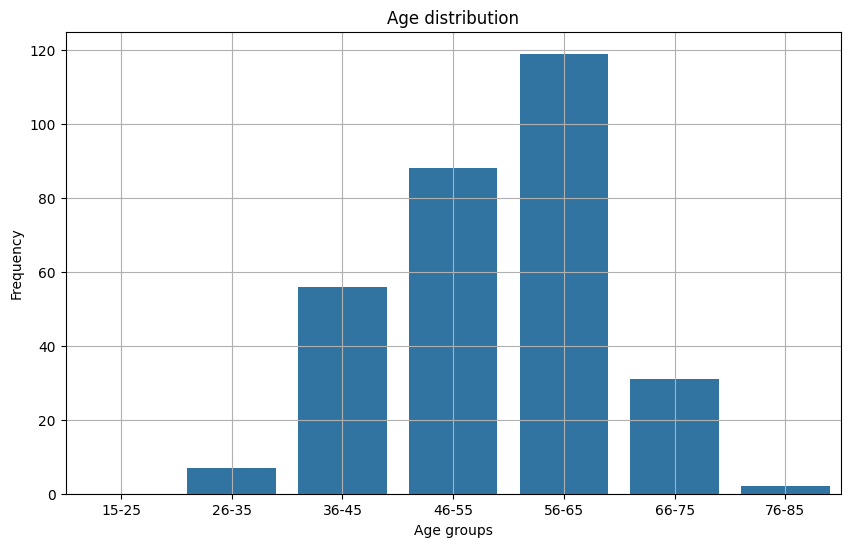

In [33]:
# separating patients into age bins
# Age distribution
bins = [15, 25, 35, 45, 55, 65, 75, 85]
working_df['Age_grps'] = pd.cut(working_df['Age'], bins=bins, labels=['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85'])
age_dist = working_df['Age_grps'].value_counts().sort_index().reset_index(name='count')
display(age_dist)

plt.figure(figsize=(10,6))
sns.barplot(data=age_dist, x='Age_grps', y='count')
plt.title('Age distribution')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

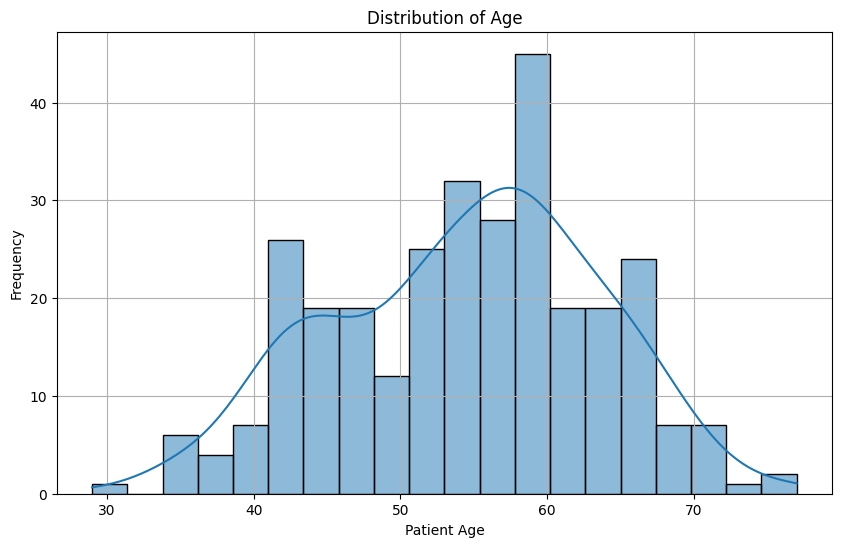

In [34]:
# Age histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=working_df, x='Age', kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

,Sex,g_counts
0,M,206
1,F,97


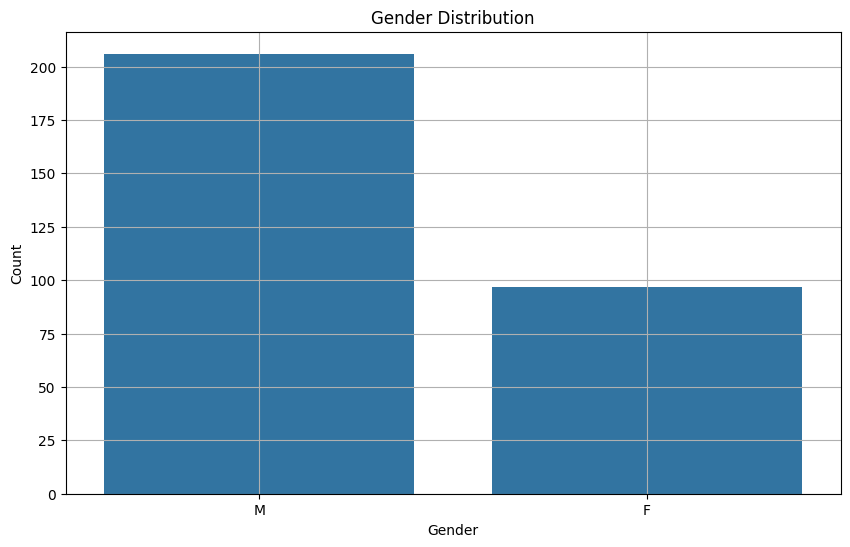

In [35]:
# gender distribution
gender_dist = working_df['Sex'].value_counts().reset_index(name='g_counts')
gender_dist.replace([0,1],['F','M'],inplace=True)
display(gender_dist)


plt.figure(figsize=(10,6))
sns.barplot(data=gender_dist, x='Sex', y='g_counts')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.grid(True)
plt.show()


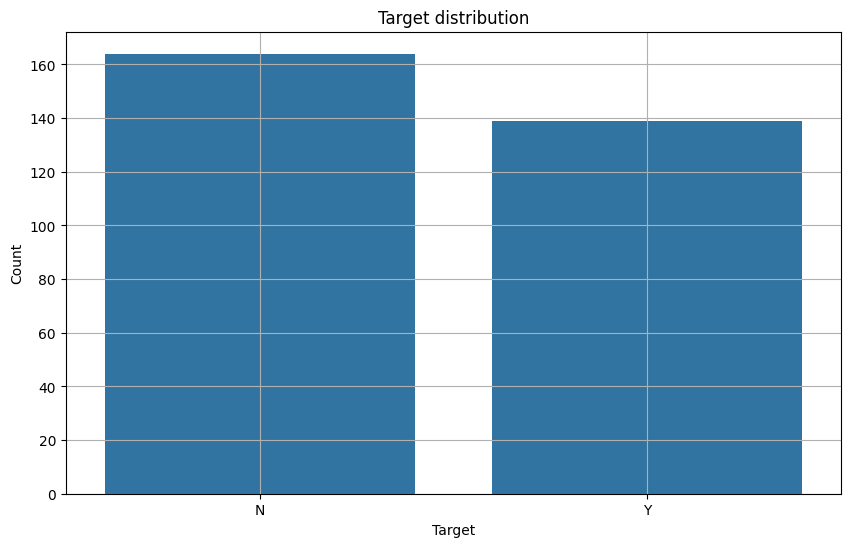

In [36]:
# no. of people with the disease

target_dist = working_df['Target'].value_counts().reset_index(name='Count')
target_dist.replace([0,1], ['N', 'Y'], inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=target_dist, x='Target', y='Count')
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.grid(True)
plt.show()

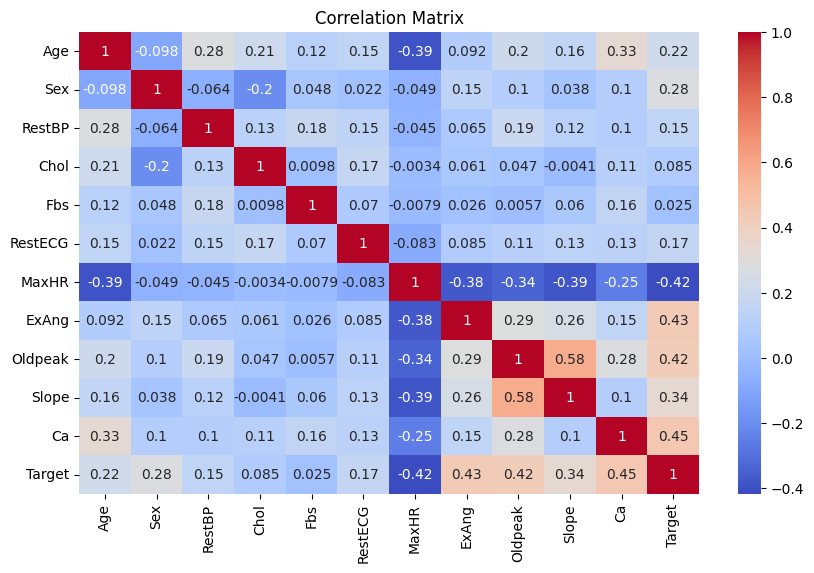

In [37]:
# correlation matrix

corr = working_df[['Age',	'Sex', 	'RestBP',	'Chol',	'Fbs',	'RestECG',	'MaxHR',	'ExAng',	'Oldpeak',	'Slope',	'Ca',	'Target']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the heatmap above, we observe that the r values produced after the Pearson's correlation test between each pairing is relatively small. This suggests that besides Oldpeak and Slope which have the highest r value of 0.58, the remaining pairs show weak to less moderate strength in terms of correlation.

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x

<Figure size 1000x600 with 0 Axes>

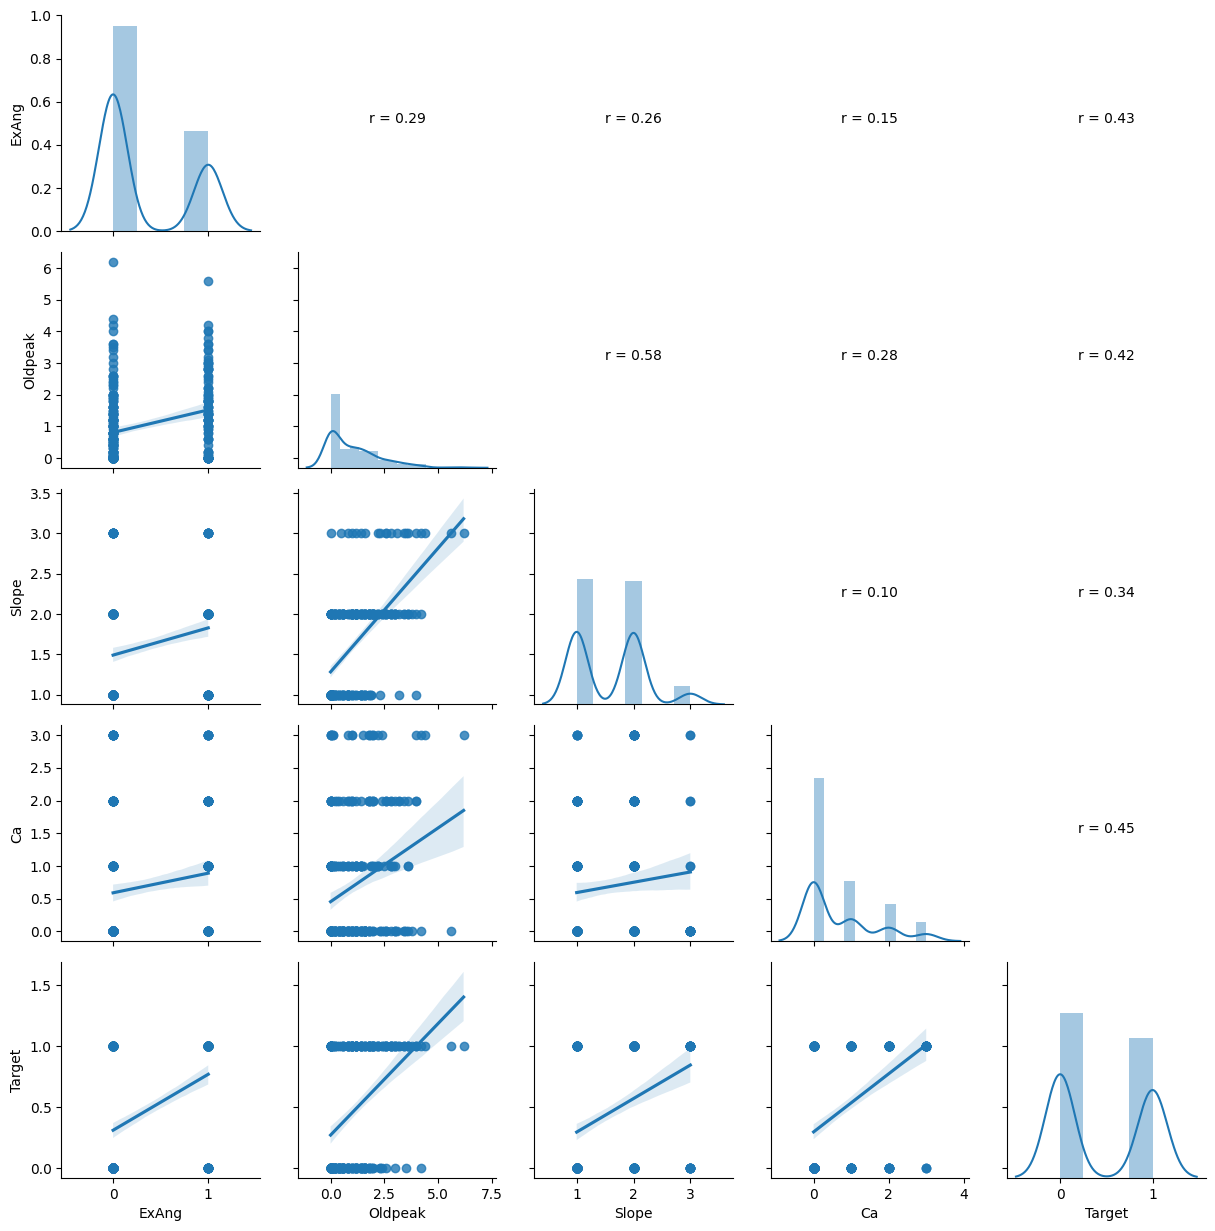

In [38]:
# correlation analysis of the various variables (should only plot this to see better results)
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

plt.figure(figsize=(10,6))
g = sns.PairGrid(working_df[['ExAng',	'Oldpeak',	'Slope',	'Ca',	'Target']])
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

In [39]:
# plots graphs / regression lines to understand the strength of correlation between the variables
display(working_df.isna())

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target,Age_grps
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### **Feature Engineering**

In [40]:
display(working_df)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target,Age_grps
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0,56-65
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1,66-75
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1,66-75
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0,36-45
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,1,36-45
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,1,66-75
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,1,56-65
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,1,56-65


In [55]:
# calculates the cholestrol to age ratio; capturing the relative risk of cholestrol
working_df['chol_age_ratio'] = working_df['Chol'] / working_df['Age']

#calculates the stress incurred due to exercise
working_df['exercise_stress'] = working_df['Oldpeak'] * working_df['ExAng']

#calculates the risk compounding factor by combining the 2 risk factors: HBP & cholesterol
working_df['bp_chol_pdt'] = working_df['RestBP'] * working_df['Chol']

# calculates the resting bp  to maximum heart rate (checks for potential cardiovasular inefficiency)
working_df['bp_hr'] = working_df['RestBP']/working_df['MaxHR']

display(working_df)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,Thal,Target,Age_grps,chol_age_ratio,exercise_stress,bp_chol_pdt,chol_threshold,RestBP_cat,bp_hr
0,63,1,typical,145,233,1,2,150,0,2.3,...,0,fixed,0,56-65,3.698413,0.0,33785,1,HBP II,0.966667
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,...,3,normal,1,66-75,4.268657,1.5,45760,1,HBP II,1.481481
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,...,2,reversable,1,66-75,3.417910,2.6,27480,0,Normal,0.930233
3,37,1,nonanginal,130,250,0,0,187,0,3.5,...,0,normal,0,36-45,6.756757,0.0,32500,1,HBP I,0.695187
4,41,0,nontypical,130,204,0,2,172,0,1.4,...,0,normal,0,36-45,4.975610,0.0,26520,0,HBP I,0.755814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,...,0,reversable,1,36-45,5.866667,0.0,29040,1,Normal,0.833333
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,...,2,reversable,1,66-75,2.838235,0.0,27792,0,HBP II,1.021277
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,...,1,reversable,1,56-65,2.298246,1.2,17030,0,HBP I,1.130435
301,57,0,nontypical,130,236,0,2,174,0,0.0,...,1,normal,1,56-65,4.140351,0.0,30680,1,HBP I,0.747126


In [56]:
#categorizing whether patient has high cholesterol
working_df['chol_threshold'] = (working_df['Chol']>230).astype(int)

#categorizing based on resting blood pressure
highest_restbp = working_df['RestBP'].max()
bins_bp = [0, 120, 129, 139, 179,highest_restbp]
working_df['RestBP_cat'] = pd.cut(working_df['RestBP'], bins=bins_bp, labels=['Normal', 'Elevated', 'HBP I', 'HBP II', 'Crisis'])

display(working_df)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,Thal,Target,Age_grps,chol_age_ratio,exercise_stress,bp_chol_pdt,chol_threshold,RestBP_cat,bp_hr
0,63,1,typical,145,233,1,2,150,0,2.3,...,0,fixed,0,56-65,3.698413,0.0,33785,1,HBP II,0.966667
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,...,3,normal,1,66-75,4.268657,1.5,45760,1,HBP II,1.481481
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,...,2,reversable,1,66-75,3.417910,2.6,27480,0,Normal,0.930233
3,37,1,nonanginal,130,250,0,0,187,0,3.5,...,0,normal,0,36-45,6.756757,0.0,32500,1,HBP I,0.695187
4,41,0,nontypical,130,204,0,2,172,0,1.4,...,0,normal,0,36-45,4.975610,0.0,26520,0,HBP I,0.755814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,...,0,reversable,1,36-45,5.866667,0.0,29040,1,Normal,0.833333
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,...,2,reversable,1,66-75,2.838235,0.0,27792,0,HBP II,1.021277
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,...,1,reversable,1,56-65,2.298246,1.2,17030,0,HBP I,1.130435
301,57,0,nontypical,130,236,0,2,174,0,0.0,...,1,normal,1,56-65,4.140351,0.0,30680,1,HBP I,0.747126


In [59]:
# polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(working_df[['Age','Chol','RestBP']])
poly_df = pd.DataFrame(poly_features,columns=poly.get_feature_names_out(['Age','Chol','RestBP']))

new_df = working_df.drop(columns=['Age','Chol','RestBP'])
new_df = pd.concat([new_df.reset_index(drop=True),poly_df.reset_index(drop=True)], axis=1)


# **ML testing**

### ***Data Processing***

In [84]:
print(working_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              303 non-null    int32   
 1   Sex              303 non-null    int32   
 2   ChestPain        303 non-null    object  
 3   RestBP           303 non-null    int32   
 4   Chol             303 non-null    int32   
 5   Fbs              303 non-null    int32   
 6   RestECG          303 non-null    int32   
 7   MaxHR            303 non-null    int32   
 8   ExAng            303 non-null    int32   
 9   Oldpeak          303 non-null    float64 
 10  Slope            303 non-null    int32   
 11  Ca               303 non-null    int32   
 12  Thal             303 non-null    object  
 13  Target           303 non-null    int32   
 14  Age_grps         303 non-null    category
 15  chol_age_ratio   303 non-null    float64 
 16  exercise_stress  303 non-null    float64 
 1

In [85]:
# manipulating dataset (with all the variables)

y = working_df[['Target']]
cat_data = working_df.select_dtypes(include=['object','category']).drop(columns=['Age_grps'])
num_data = working_df.select_dtypes(include=['int32','int64', 'float64']).drop(columns=['Target'])

encoder = OneHotEncoder(sparse_output=False)
cat_data_ohe = encoder.fit_transform(cat_data)
ohe_df = pd.DataFrame(cat_data_ohe, columns=encoder.get_feature_names_out(cat_data.columns))
print(ohe_df)

df_ohe = pd.concat([num_data, ohe_df], axis=1)
print(df_ohe)



     ChestPain_asymptomatic  ChestPain_nonanginal  ChestPain_nontypical  \
0                       0.0                   0.0                   0.0   
1                       1.0                   0.0                   0.0   
2                       1.0                   0.0                   0.0   
3                       0.0                   1.0                   0.0   
4                       0.0                   0.0                   1.0   
..                      ...                   ...                   ...   
298                     0.0                   0.0                   0.0   
299                     1.0                   0.0                   0.0   
300                     1.0                   0.0                   0.0   
301                     0.0                   0.0                   1.0   
302                     0.0                   1.0                   0.0   

     ChestPain_typical  Thal_fixed  Thal_nan  Thal_normal  Thal_reversable  \
0                  1.

In [86]:
# splitting data

X_train, X_test, y_train, y_test = train_test_split(df_ohe, y, test_size=0.2, random_state=42)

In [87]:
# normalizing data; scale based on the different datasets instead of the original dataset

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform the test data

print(X_train_scaled)

[[-2.83850353  0.72250438 -0.12598175 ...  1.91150364 -0.70272837
  -0.67015058]
 [ 0.24135234  0.72250438  0.97465301 ... -0.52314836  1.42302495
  -0.67015058]
 [ 1.56129057  0.72250438  1.52497038 ... -0.52314836  1.42302495
  -0.67015058]
 ...
 [ 0.46134205  0.72250438  0.42433563 ... -0.52314836  1.42302495
  -0.67015058]
 [ 0.68133175  0.72250438  0.42433563 ... -0.52314836  1.42302495
  -0.67015058]
 [ 0.24135234 -1.38407465 -0.23604522 ... -0.52314836 -0.70272837
  -0.67015058]]


In [88]:
import warnings

# Initialize the logistic regression model and RFE
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=20)

# Fit RFE on the training data only
rfe.fit(X_train_scaled, y_train)

# Get the selected features
x_train_selected = rfe.fit_transform(X_train_scaled, y_train)
x_test_selected = rfe.transform(X_test_scaled)


c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

### ***Logistic Regression***

In [89]:
# logistic regression

log_reg_model = LogisticRegression()
log_reg_model.fit(x_train_selected, y_train)

y_pred_logreg = log_reg_model.predict(x_test_selected)

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(log_reg_model, df_ohe, y, cv=10)

# Print cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Get the mean cross-validation score
print("Mean cross-validation score:", cv_scores.mean())

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Cross-validation scores: [0.70967742 0.74193548 0.80645161 0.93333333 0.9        0.7
 0.66666667 0.76666667 0.7        0.73333333]
Mean cross-validation score: 0.7658064516129033


c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

In [91]:
# Evaluation of Logistic regression

mse_logreg = mean_squared_error(y_test, y_pred_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Mean Squared Error: {mse_logreg:0.3f}")
print(f"R-squared: {r2_logreg:0.3f}")
print(f"Accuracy: {acc_logreg:0.5f}")

matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"\nAUC: {auc_logreg:0.3f}")
print("Confusion Matrix: ")
print(matrix_logreg)
print("\nClassification report: ")
print(report_logreg)



Mean Squared Error: 0.164
R-squared: 0.343
Accuracy: 0.83607

AUC: 0.836
Confusion Matrix: 
[[24  5]
 [ 5 27]]

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### ***Random Forest***

In [92]:
# using random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_selected, y_train)

y_pred_rf = rf_model.predict(x_test_selected)

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [93]:
# evaluation of random forest

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf:0.3f}")
print(f"R-squared: {r2_rf:0.3f}")
print(f"Accuracy: {acc_rf:0.5f}\n")

matrix_rf = confusion_matrix(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)
report_rf= classification_report(y_test, y_pred_rf)

print(f"AUC: {auc_rf:0.3f}")
print("Confusion Matrix: ")
print(matrix_rf)
print("\nClassification report: ")
print(report_rf)


Mean Squared Error: 0.131
R-squared: 0.474
Accuracy: 0.86885

AUC: 0.873
Confusion Matrix: 
[[28  1]
 [ 7 25]]

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.96      0.78      0.86        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### ***Decision Tree***

In [94]:
# decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_selected, y_train)

y_pred_dt = dt_model.predict(x_test_selected)


In [95]:
# evaluation of decision tree

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Mean Squared error: {mse_dt:0.3f}")
print(f"R-squared: {r2_dt:0.3f}")
print(f"Accuracy: {acc_dt:0.5f}\n")

matrix_dt = confusion_matrix(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)
report_dt= classification_report(y_test, y_pred_dt)

print(f"AUC: {auc_dt:0.3f}")
print("Confusion Matrix: ")
print(matrix_dt)
print("\nClassification report: ")
print(report_dt)

Mean Squared error: 0.246
R-squared: 0.014
Accuracy: 0.75410

AUC: 0.753
Confusion Matrix: 
[[21  8]
 [ 7 25]]

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.76      0.78      0.77        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

